Make model

In [2]:
from keras import layers
from keras import models


model = models.Sequential([
    layers.Conv2D(
        32, (3, 3), activation="relu",
        input_shape=(150, 150, 3)
    ),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),

    layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [6]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'prepared_dataset/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    'prepared_dataset/validation',
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 105s 1s/step - loss: 0.6976 - accuracy: 0.5070 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 93s 935ms/step - loss: 0.6923 - accuracy: 0.5495 - val_loss: 1.0483 - val_accuracy: 0.5010
Epoch 3/30
100/100 [==============================] - 95s 947ms/step - loss: 0.6683 - accuracy: 0.6075 - val_loss: 0.6645 - val_accuracy: 0.6040
Epoch 4/30
100/100 [==============================] - 93s 935ms/step - loss: 0.6123 - accuracy: 0.6810 - val_loss: 0.8346 - val_accuracy: 0.6010
Epoch 5/30
100/100 [==============================] - 93s 928ms/step - loss: 0.5829 - accuracy: 0.6960 - val_loss: 0.5709 - val_accuracy: 0.7120
Epoch 6/30
100/100 [==============================] - 93s 935ms/step - loss: 0.5232 - accuracy: 0.7455 - val_loss: 0.5757 - val_accuracy: 0.7130
Epoch 7/30
100/100 [==============================] - 93s 931ms/step - loss: 0.4853 - accuracy: 0.7595 - val_loss: 0.5977 - val_accu

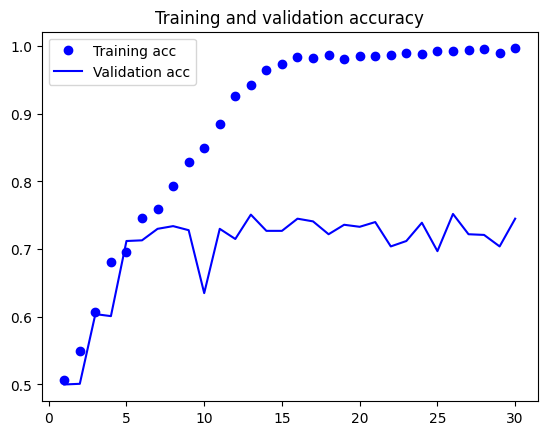

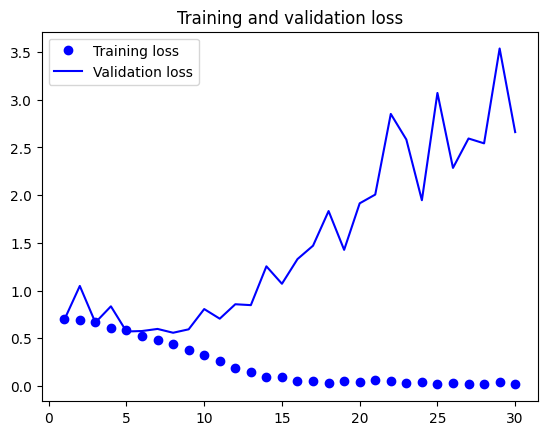

In [8]:
import matplotlib.pyplot as plt


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

data augmentation

In [11]:
from keras import layers
from keras import models


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["acc"]
)


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'prepared_dataset/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    'prepared_dataset/validation',
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\Serhii\AppData\Local\Temp\ipykernel_11124\2136679975.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 101s 997ms/step - loss: 0.7205 - acc: 0.4970 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 97s 971ms/step - loss: 0.6925 - acc: 0.5205 - val_loss: 0.6991 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 98s 983ms/step - loss: 0.6918 - acc: 0.5500 - val_loss: 0.6834 - val_acc: 0.5650
Epoch 4/100
100/100 [==============================] - 98s 975ms/step - loss: 0.6833 - acc: 0.5650 - val_loss: 0.6622 - val_acc: 0.5920
Epoch 5/100
100/100 [==============================] - 97s 972ms/step - loss: 0.6650 - acc: 0.6105 - val_loss: 0.6268 - val_acc: 0.6470
Epoch 6/100
100/100 [==============================] - 97s 969ms/step - loss: 0.6626 - acc: 0.5990 - val_loss: 0.6160 - val_acc: 0.6690
Epoch 7/100
100/100 [==============================] - 98s 977ms/step - loss: 0.6433 - acc: 0.6285 - val_loss: 0.6169 - val_acc: 0.6780
Epoch 8/100
100/100 [==========================

Epoch 61/100
100/100 [==============================] - 96s 964ms/step - loss: 0.4129 - acc: 0.8160 - val_loss: 0.3885 - val_acc: 0.8400
Epoch 62/100
100/100 [==============================] - 96s 959ms/step - loss: 0.4095 - acc: 0.8175 - val_loss: 0.3988 - val_acc: 0.8310
Epoch 63/100
100/100 [==============================] - 96s 960ms/step - loss: 0.4184 - acc: 0.8195 - val_loss: 0.4677 - val_acc: 0.7950
Epoch 64/100
100/100 [==============================] - 96s 956ms/step - loss: 0.3949 - acc: 0.8275 - val_loss: 0.5391 - val_acc: 0.7660
Epoch 65/100
100/100 [==============================] - 96s 962ms/step - loss: 0.4208 - acc: 0.8135 - val_loss: 0.4481 - val_acc: 0.7950
Epoch 66/100
100/100 [==============================] - 96s 964ms/step - loss: 0.3892 - acc: 0.8295 - val_loss: 0.3921 - val_acc: 0.8400
Epoch 67/100
100/100 [==============================] - 97s 968ms/step - loss: 0.4078 - acc: 0.8185 - val_loss: 0.4163 - val_acc: 0.8260
Epoch 68/100
100/100 [===================

In [20]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

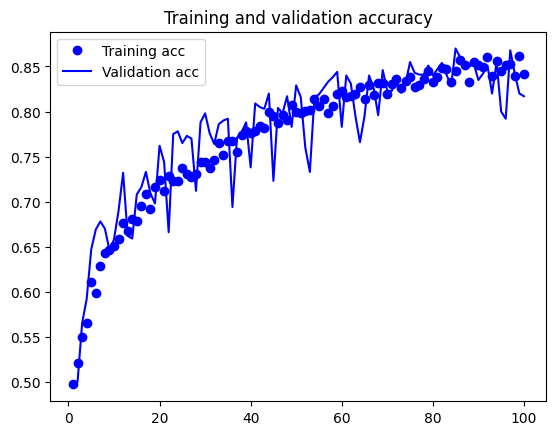

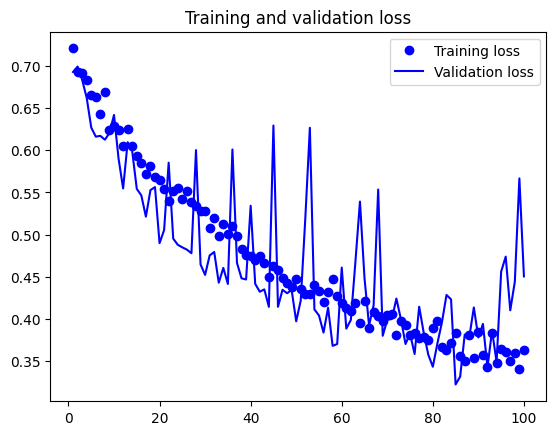

In [21]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [23]:
# Save the weights
model.save('Cats vs Dogs')

INFO:tensorflow:Assets written to: Cats vs Dogs\assets


INFO:tensorflow:Assets written to: Cats vs Dogs\assets


feature extraction

In [24]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 56s 1us/step


In [25]:
import tensorflow as tf


from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers



conv_base.trainable = False

model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(1, activation="sigmoid"),
])

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["acc"]
)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [30]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/50
100/100 [==============================] - 668s 7s/step - loss: 0.3473 - acc: 0.8505 - val_loss: 0.2596 - val_acc: 0.9000
Epoch 2/50
100/100 [==============================] - 663s 7s/step - loss: 0.3465 - acc: 0.8430 - val_loss: 0.2567 - val_acc: 0.9010
Epoch 3/50
100/100 [==============================] - 664s 7s/step - loss: 0.3214 - acc: 0.8645 - val_loss: 0.2631 - val_acc: 0.8910
Epoch 4/50
100/100 [==============================] - 667s 7s/step - loss: 0.3300 - acc: 0.8575 - val_loss: 0.2570 - val_acc: 0.8890
Epoch 5/50
100/100 [==============================] - 661s 7s/step - loss: 0.3242 - acc: 0.8640 - val_loss: 0.2528 - val_acc: 0.9010
Epoch 6/50
100/100 [==============================] - 659s 7s/step - loss: 0.3245 - acc: 0.8705 - val_loss: 0.2559 - val_acc: 0.8940
Epoch 7/50
100/100 [==============================] - 659s 7s/step - loss: 0.3133 - acc: 0.8655 - val_loss: 0.2445 - val_acc: 0.8990
Epoch 8/50
100/100 [==============================] - 660s 7s/step - 

In [31]:
# Save model
model.save('Cats vs Dogs_vgg16')

INFO:tensorflow:Assets written to: Cats vs Dogs_vgg16\assets


INFO:tensorflow:Assets written to: Cats vs Dogs_vgg16\assets


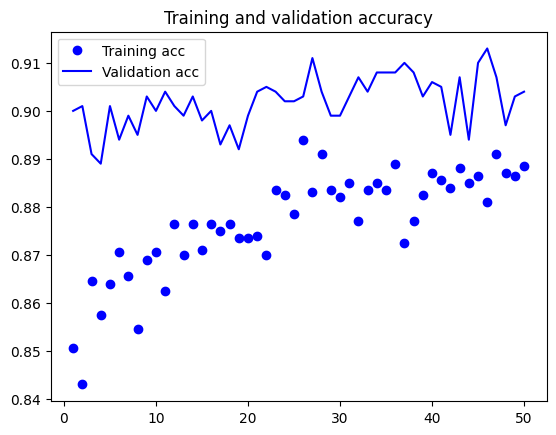

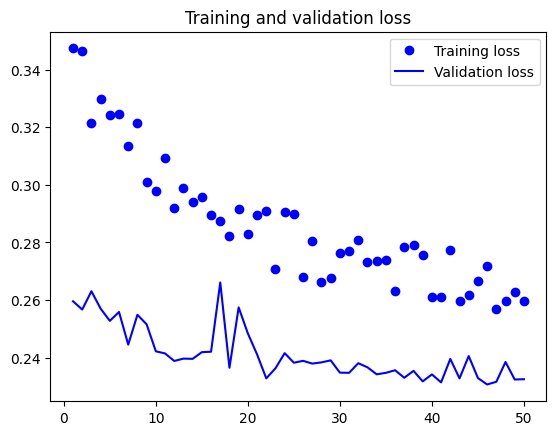

In [32]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [35]:


print("Model last validation accuracy:", history.history["val_acc"][-1] * 100)

Model last validation accuracy: 90.39999842643738


fine-tuning

In [36]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [37]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [38]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [39]:
modified_model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(1, activation="sigmoid"),
])

In [44]:
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
    metrics=["acc"]
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/50
100/100 [==============================] - 763s 8s/step - loss: 0.2760 - acc: 0.8915 - val_loss: 0.2279 - val_acc: 0.9050
Epoch 2/50
100/100 [==============================] - 748s 8s/step - loss: 0.2401 - acc: 0.8975 - val_loss: 0.2153 - val_acc: 0.9100
Epoch 3/50
100/100 [==============================] - 747s 7s/step - loss: 0.2177 - acc: 0.9100 - val_loss: 0.2241 - val_acc: 0.9150
Epoch 4/50
100/100 [==============================] - 789s 8s/step - loss: 0.2149 - acc: 0.9100 - val_loss: 0.2812 - val_acc: 0.8980
Epoch 5/50
100/100 [==============================] - 825s 8s/step - loss: 0.2047 - acc: 0.9180 - val_loss: 0.2018 - val_acc: 0.9240
Epoch 6/50
100/100 [==============================] - 827s 8s/step - loss: 0.1622 - acc: 0.9330 - val_loss: 0.1870 - val_acc: 0.9330
Epoch 7/50
100/100 [==============================] - 825s 8s/step - loss: 0.1698 - acc: 0.9310 - val_loss: 0.2405 - val_acc: 0.9190
Epoch 8/50
100/100 [==============================] - 811s 8s/step - 